In [9]:
import random as rnd
import numpy as np
import statistics as stat
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Simulación de Procesos Poisson...
## Procesos Estocásticos 2023-2
## Juan Pablo Rodríguez Villagran

Para simular un Proceso Poisson, contrario a lo que uno cree, no necesitamos simular variables aleatorias Poisson. Recordemos primero entonces la segunda definición de Proceso Poisson y el primer resultado que se tiene al respecto.<br>
**Definición.** Una familia $\{N_t\}_{t\geq0}$ con valores en $\mathbb{N}\cup\{0\}$, diremos que es un proceso Poisson homogéneo con intensidad $\lambda>0$ si satisface las siguientes propiedades:
1. $N_0=0$,
2. Si $t_1<t_2$, entonces $N_{t_1}\leq N_{t_2}$,
3. Tiene incrementos independientes y estacionarios,
4. Para cada $h>0,\ \mathbb{P}[N_h=1]=\lambda h+o(h)$ y,
5. Para cada $h>0,\ \mathbb{P}[N_h\geq2]=o(h)$.

Las primeras dos propiedades dicen que es un proceso de contar, lo importante de la cuarta propiedad es que *el proceso Poisson es casi una variable aleatoria Bernoulli* (salvo por términos de orden $o(h)$), y la quinta propiedad sugiere que los saltos del proceso son *a lo más de tamaño 1*.

Para una versión incluso más directa sobre la que será la estrategia de simulación, tenemos *otra* definición de proceso Poisson homogéneo:<br>
**Definición.** Sea $(T_n)_{n\geq1}$ una sucesión de variables aleatorias independientes idénticamente distribuidas tales que $T_i\sim\text{exp}(\lambda)$. Denotamos por $W_n=\sum_{i=1}^nT_i$. Definimos a un *proceso Poisson homogéneo* con intensidad $\lambda>0$ a la familia de variables aleatorias $N_t,\ t\geq0$ dadas por:
$$N_t=\sum_{i=1}^\infty 1_{W_t\leq t},\quad t>0,\ N_0=0,$$
donde, para cada $t>0$:
$$1_{W_i\leq t}=\begin{cases}
1, & \text{si}\ W_i\leq t\\
0, & \text{si}\ W_i>t.
\end{cases}$$
Entonces, para simular un proceso Poisson homogéneo, **es suficiente saber cuándo ocurren los eventos**.

Por último, un resultado que quizás no fue muy valorado en la teoría del tema pero nos será de gran utilidad para esto es el teorema sobre la distribución conjunta de los tiempos de ocurrencia:<br>
**Teorema.** Sea $(N_t)_{t\geq0}$ un proceso Poisson homogéneo con intensidad $\lambda$, entonces la distribución conjunta de $W_1,...,W_n$ dado que $N_t=n$ es la distribución de las estadísticas de orden de $n$ variables aleatorias independientes idénticamente distribuidas con distribución $U(0,1)$.<br>
A continuación, un ejemplo donde lo hacemos artesanalmente con exponenciales y otro donde sólo generamos un a muestra uniforme de tamaño $n$.

Resultado auxiliar, tanto para el homogéneo como el compuesto:<br>
**Teorema.** Sean $U$ una variable aleatoria uniforme en $(0,1)$, $X$ una variable aleatoria continua con función de distribución $F_X$ con inversa generalizada $F^{-1}_X$, entonces $Z=F_X^{-1}(U)$ es una variable aleatoria tal que $Z\overset{d}{=}X$.<br>
El poder de este teorema está en que *cualquier variable aleatoria continua puede obtenerse a partir de una uniforme*.<br>
En el caso de la exponencial, que es la que necesitamos (los tiempos son exponenciales...), sea $X\sim\text{exp}(\lambda)$:
$$F_X(x)=1-e^{-\lambda x},\ x\geq0\implies 1-y=e^{-\lambda x}\iff x=-\frac{1}{\lambda}\ln(1-y)\implies F_X^{-1}(x)=-\frac{1}{\lambda}\ln(1-x),\ x\in[0,1)$$

In [10]:
# Definimos la intensidad del proceso:
lamb = 7
# El número de eventos:
n = 50
# Los tiempos UNIFORMES entre eventos:
TUnif = np.random.random(n)
TExp = -(1/lamb)*np.log(TUnif).cumsum()

In [11]:
TExp = np.insert(TExp,0,0)
TExp

array([0.        , 0.13562477, 0.14819057, 0.48202511, 0.53832447,
       0.70945343, 0.83703659, 0.91652308, 0.9293689 , 0.99274113,
       1.16414448, 1.25225653, 1.28369315, 1.37961142, 1.46998161,
       1.74953141, 1.9932567 , 2.36142267, 2.42621947, 2.74119919,
       2.95840913, 2.99586564, 3.09775875, 3.14912148, 3.21272235,
       3.23484612, 3.2802874 , 3.40559126, 3.58122236, 3.60283029,
       3.86902247, 3.97794843, 4.18578049, 4.41707396, 4.54219964,
       4.65878896, 4.73623762, 4.94061962, 4.9949431 , 5.77168972,
       5.95116203, 6.29749445, 6.84859494, 6.96456562, 7.03863134,
       7.30727569, 7.76944317, 8.34843268, 8.5425762 , 8.82131974,
       8.84372551])

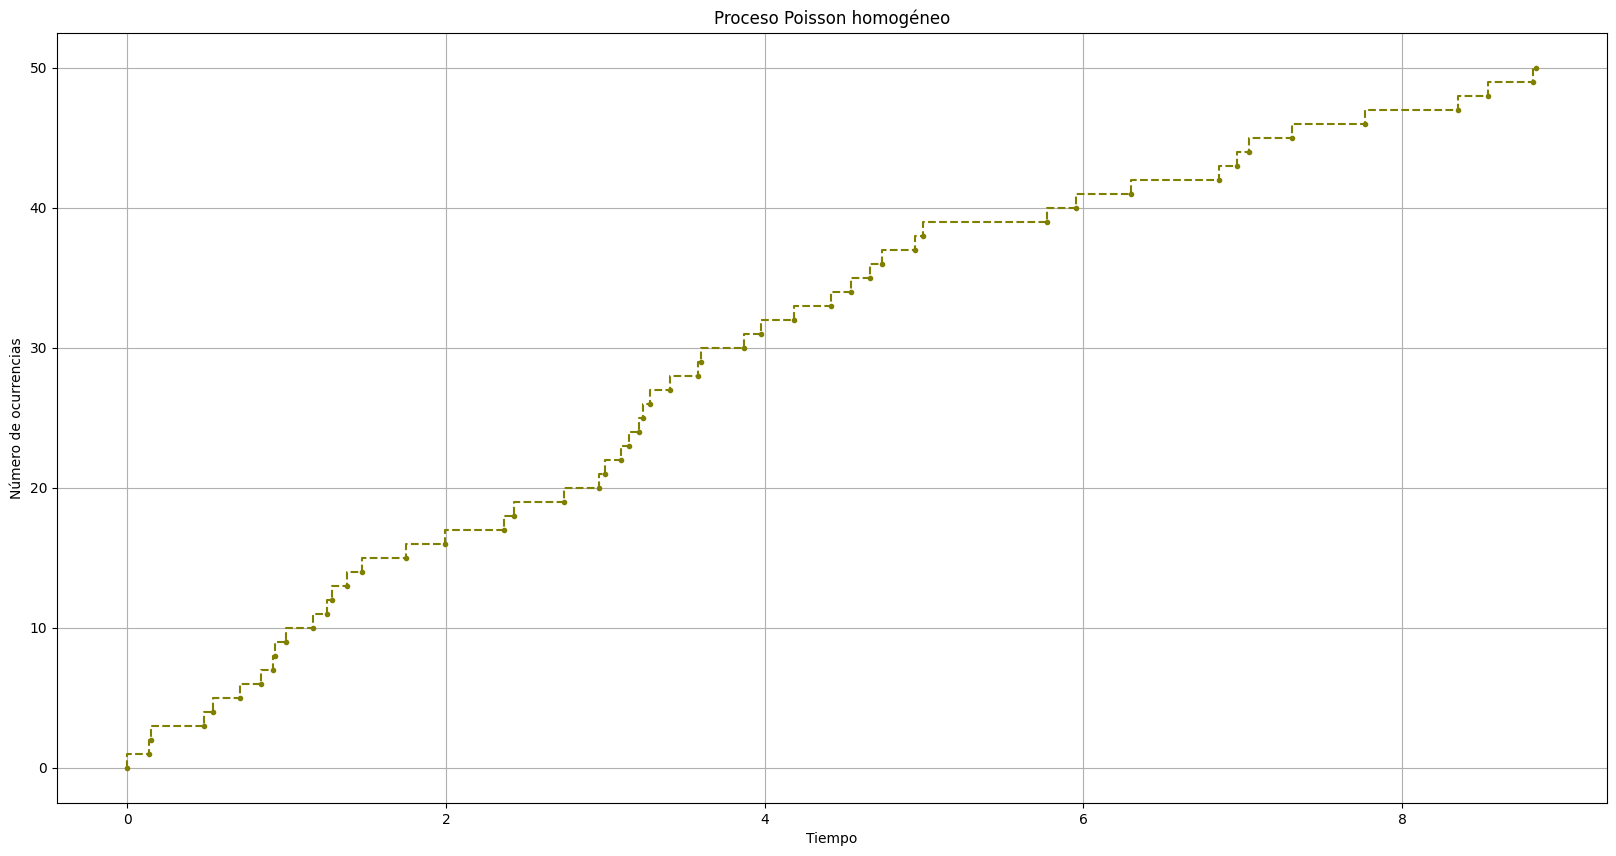

In [12]:
# Las ocurrencias:
Occ = np.ones(n).cumsum()
Occ = np.insert(Occ,0,0)
plt.figure(figsize=[20,10])
plt.step(TExp,Occ,linestyle='--',marker='.',color='olive')
plt.title('Proceso Poisson homogéneo')
plt.xlabel('Tiempo')
plt.ylabel('Número de ocurrencias')
plt.grid('on')
plt.show()

Para el **proceso Poisson compuesto**, recordemos primero la definición de éste:<br>
**Definición.** Una familia de variables aleatorias $(S_t)_{t\geq0}$ es un *proceso Poisson compuesto* si:
$$S_t=\sum_{n=1}^{N_t}X_n,\quad t\geq0,$$
donde $(N_t)_{t\geq0}$ es un proceso Poisson homogéneo de intensidad $\lambda>0$ y $\{X_n\}_{n\geq1}$ es una sucesión de variables aleatorias independientes idénticamente distribuidas e independientes al proceso Poisson.<br>
La principal diferencia entre el proceso homogéneo y el compuesto es que en el primero, los saltos son de tamaño 1 siempre, mientras que en el compuesto, el tamaño de los saltos es aleatorio y distribuyen como $X_i$ (y también, como no todas las v.a.s toman valores positivos, es posible que sea decreciente el proceso en alguna parte).<br>
Para simular esto basta cambiar la parte en la que definimos los saltos (en términos del código sería la parte de los ``np.ones``).

In [13]:
# Definimos la intensidad del proceso subyacente:
lamb = 7
# El número de eventos:
n = 50
# Los tiempos UNIFORMES entre eventos:
TUnif = np.random.random(n)
TExp = -(1/lamb)*np.log(TUnif).cumsum()
TExp = np.insert(TExp,0,0)

Veamos ejemplos para suma de normales $N(0,1)$ y de uniformes $U(0,1)$:

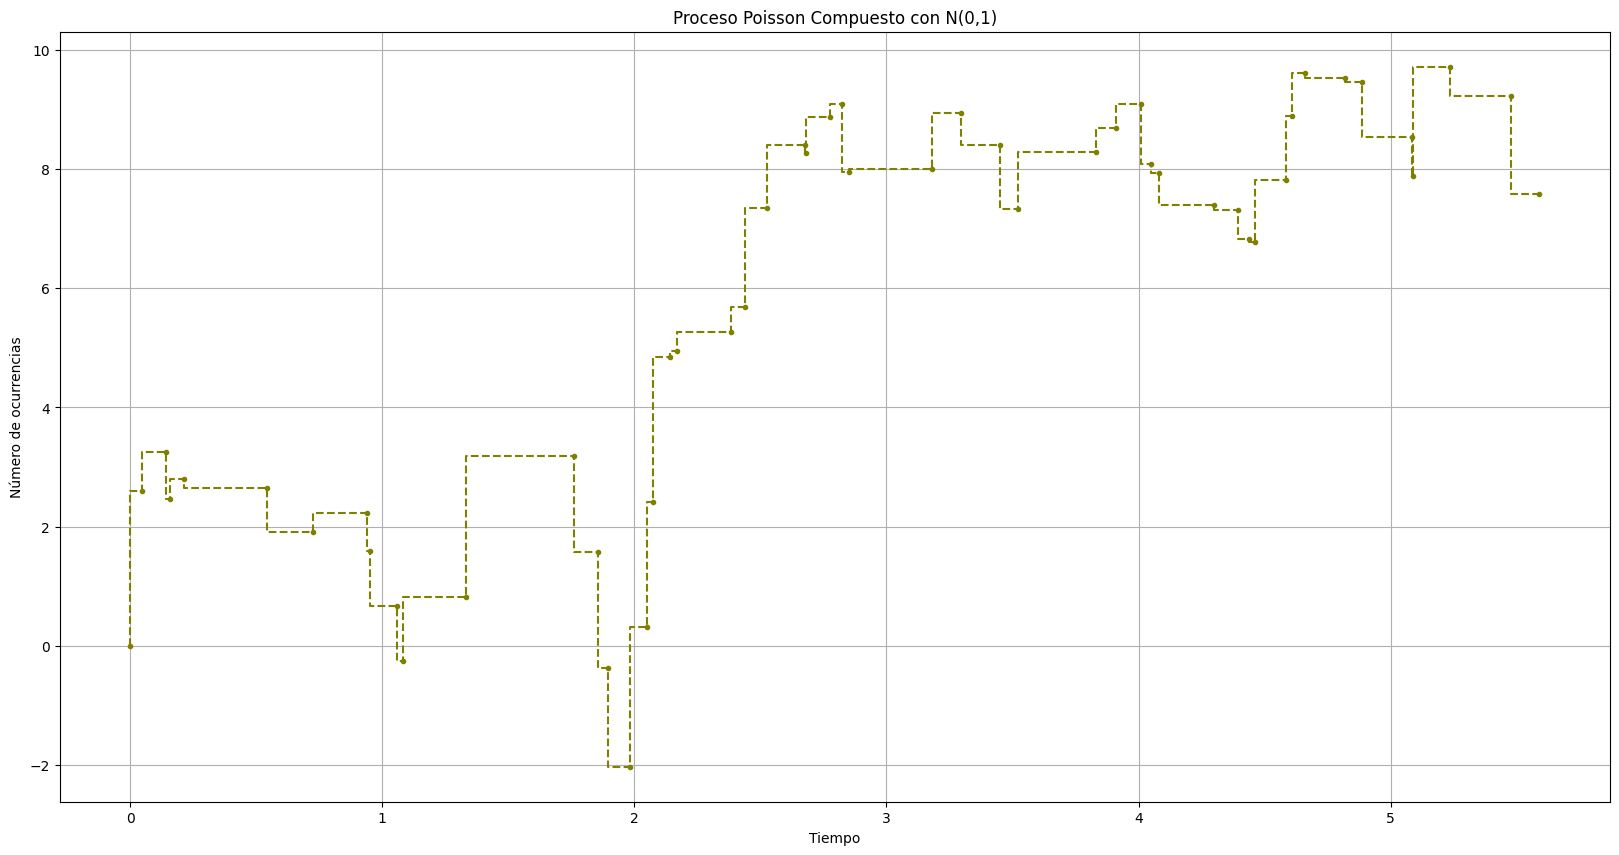

In [14]:
# Las ocurrencias:
Occ = np.random.normal(0,1,n).cumsum()
Occ = np.insert(Occ,0,0)
plt.figure(figsize=[20,10])
plt.step(TExp,Occ,linestyle='--',marker='.',color='olive')
plt.title('Proceso Poisson Compuesto con N(0,1)')
plt.xlabel('Tiempo')
plt.ylabel('Número de ocurrencias')
plt.grid('on')
plt.show()

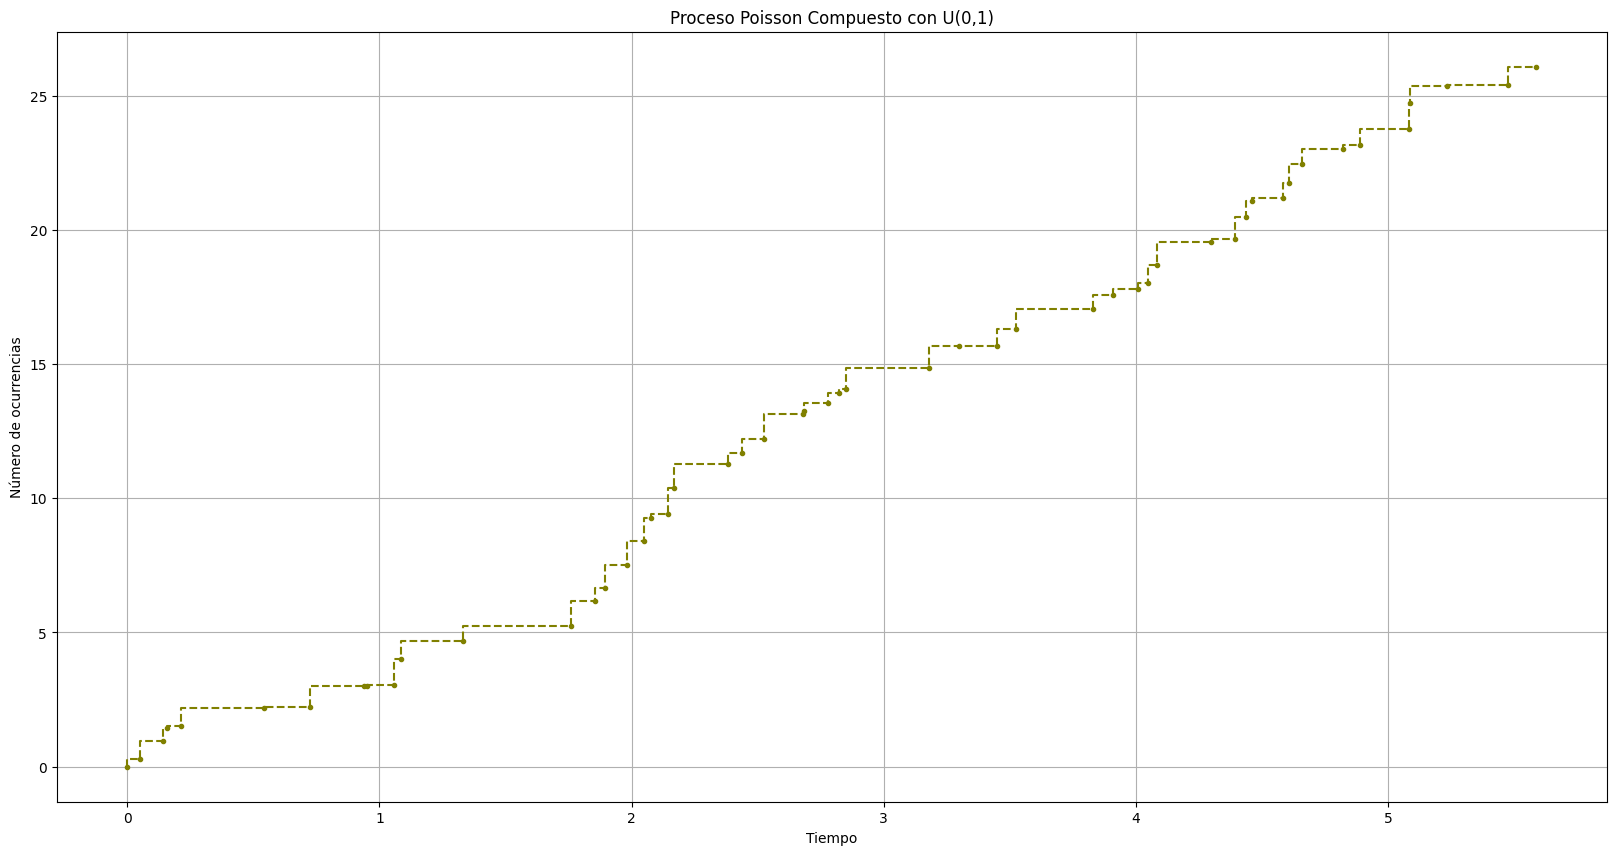

In [15]:
# Las ocurrencias:
Occ = np.random.uniform(0,1,n).cumsum()
Occ = np.insert(Occ,0,0)
plt.figure(figsize=[20,10])
plt.step(TExp,Occ,linestyle='--',marker='.',color='olive')
plt.title('Proceso Poisson Compuesto con U(0,1)')
plt.xlabel('Tiempo')
plt.ylabel('Número de ocurrencias')
plt.grid('on')
plt.show()

Ahora, el **proceso de Cramér-Lundberg**.<br>
**Definición.** Sean $x,c\in\mathbb{R}_+$, $\{X_n\}_{n\geq1}$ una colección de variables aleatorias independientes idénticamente distribuidas, $(N_t)_{t\geq0}$ un proceso Poisson homogéneo de intensidad $\lambda$ independiente a la colección $\{X_n\}_{n\geq1}$ y $S_t$ el proceso Poisson compuesto asociado a $(N_t)_{t\geq0}$ y $\{X_n\}_{n\geq1}$. Definimos el *Modelo de Cramér-Lundberg* para la reserva de una aseguradora al tiempo $t$ con capital inicial $x$ como el proceso $(R_t^x)_{t\geq0}$ dado por:
$$R_t^x=x+ct-S_t.$$
Sabemos simular $S_t$ (lo de arriba...), sólo hay que sumarle el $x+ct$.

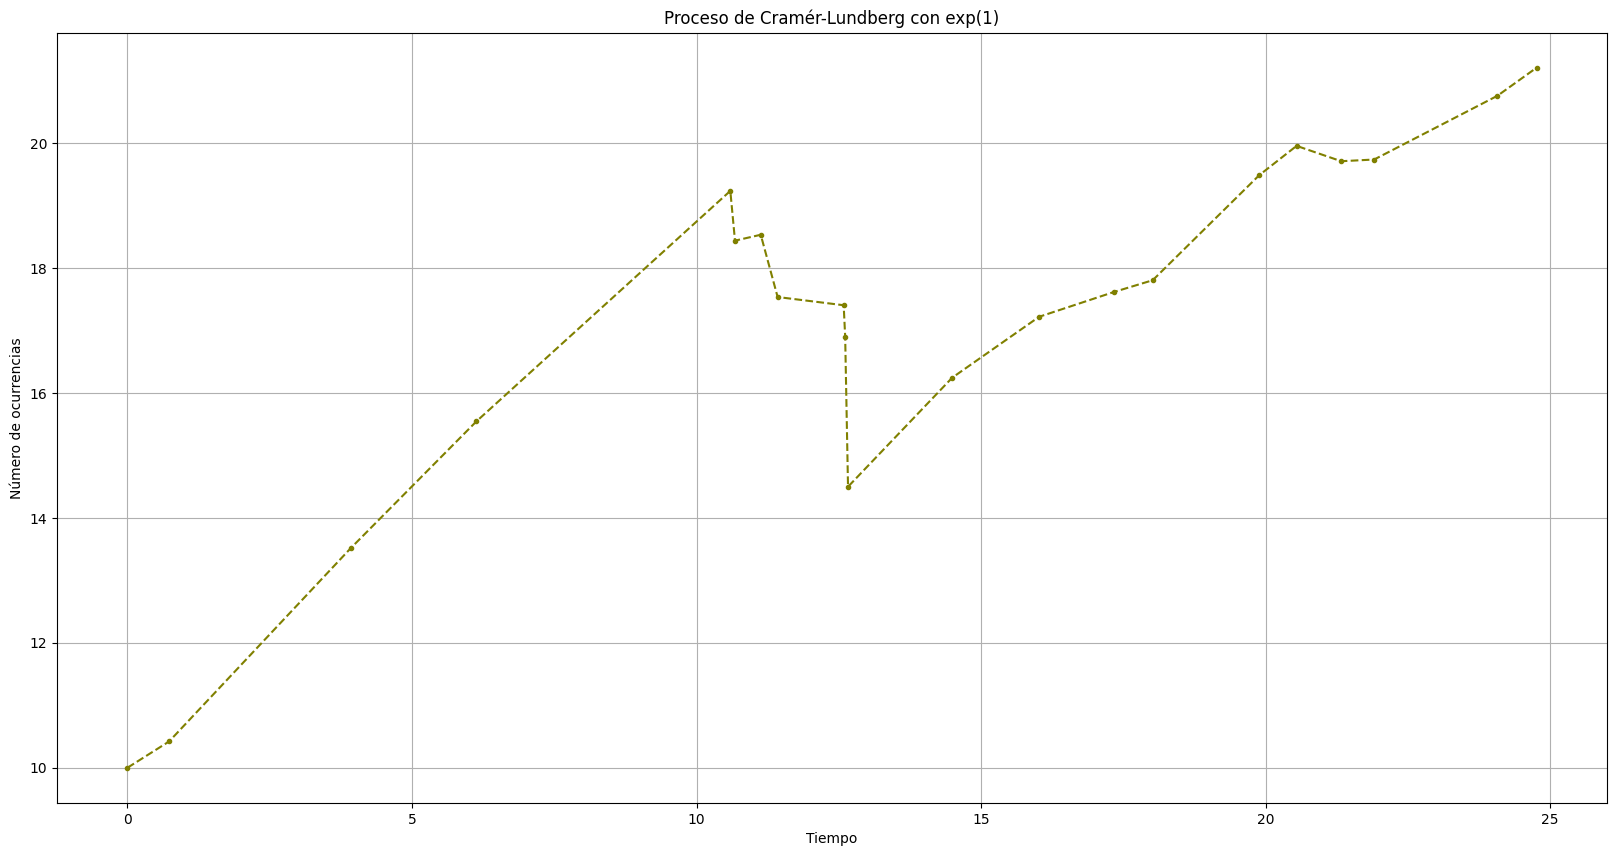

In [16]:
# Definimos la intensidad del proceso subyacente:
lamb = 1
# El número de eventos:
n = 20
# Los tiempos UNIFORMES entre eventos:
TUnif = np.random.random(n)
TExp = -(1/lamb)*np.log(TUnif).cumsum()
TExp = np.insert(TExp,0,0)

Occ = np.random.exponential(1,n).cumsum()
Occ = np.insert(Occ,0,0)
x = 10
xs = x*np.ones(n+1)
c = 1
plt.figure(figsize=[20,10])
plt.plot(TExp,xs+c*TExp-Occ,linestyle='--',marker='.',color='olive')
plt.title('Proceso de Cramér-Lundberg con exp(1)')
plt.xlabel('Tiempo')
plt.ylabel('Número de ocurrencias')
plt.grid('on')
plt.show()